## libstempo tutorial: simulating residuals with toasim

#### Michele Vallisneri, vallis@vallis.org, 2014/10/31

This notebook demonstrates the `libstempo` module `toasim`, which allows the simple simulation of various kinds of noise.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from __future__ import (print_function, division, unicode_literals)

In [3]:
import numpy as N
import libstempo as T
T.data = T.__path__[0] + '/data/' # example files
import libstempo.plot as LP, libstempo.toasim as LT

T.data = T.__path__[0] + '/data/' # example files

We open up a NANOGrav par/tim file combination with `libstempo`, and plot the residuals. 

fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '903.617')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '1024.099')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '1144.581')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '1024.099')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '301.206')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '602.411')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' '

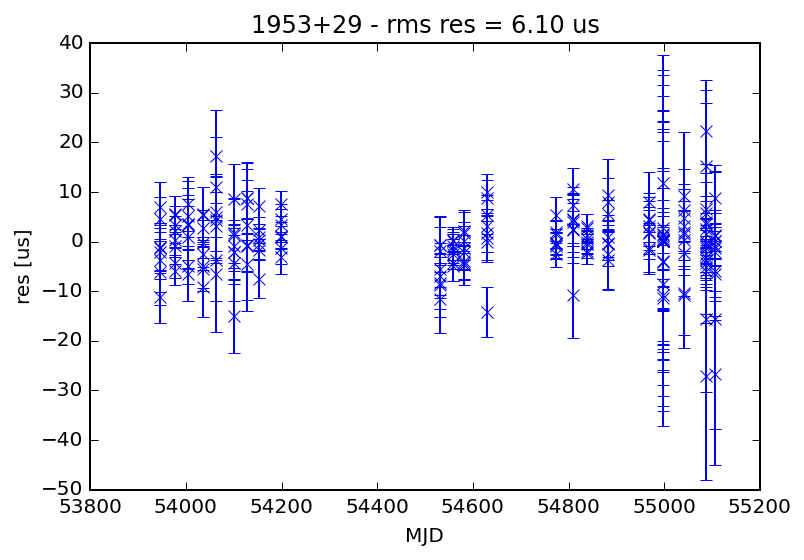

In [4]:
psr = T.tempopulsar(parfile = T.data + 'B1953+29_NANOGrav_dfg+12.par',
                    timfile = T.data + 'B1953+29_NANOGrav_dfg+12.tim')
LP.plotres(psr)

We now remove the computed residuals from the TOAs, obtaining (in effect) a perfect realization of the deterministic timing model. The pulsar parameters will have changed somewhat, so `make_ideal` calls `fit()` on the pulsar object. 

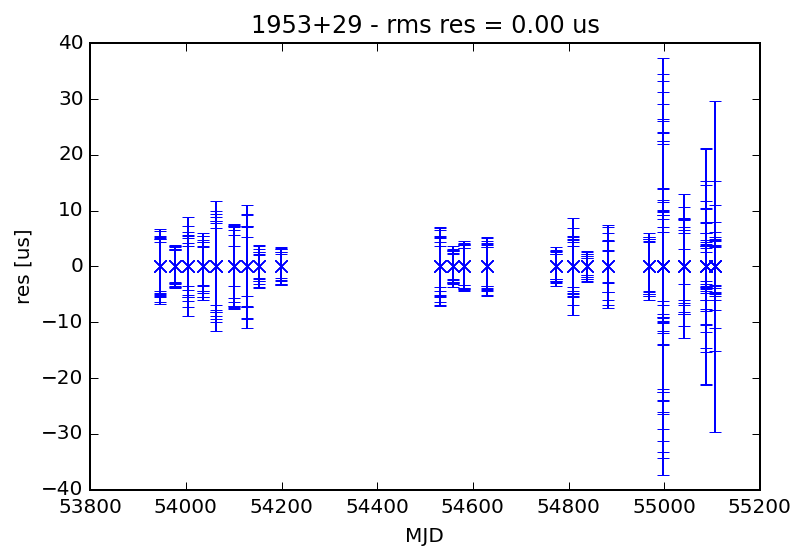

In [5]:
LT.make_ideal(psr)
LP.plotres(psr)

We now add a single line of noise at $10^{6.5}$ Hz, with an amplitude of 10 us. We also put back radiometer noise, with rms amplitude equal to 1x the nominal TOA errors.

All the noise-generating commands take an optional argument `seed` that will reseed the numpy pseudorandom-number generator, so you are able to reproduce the same instance of noise. However, if you issue several noise-generating commands in sequence, you should use different seeds. 

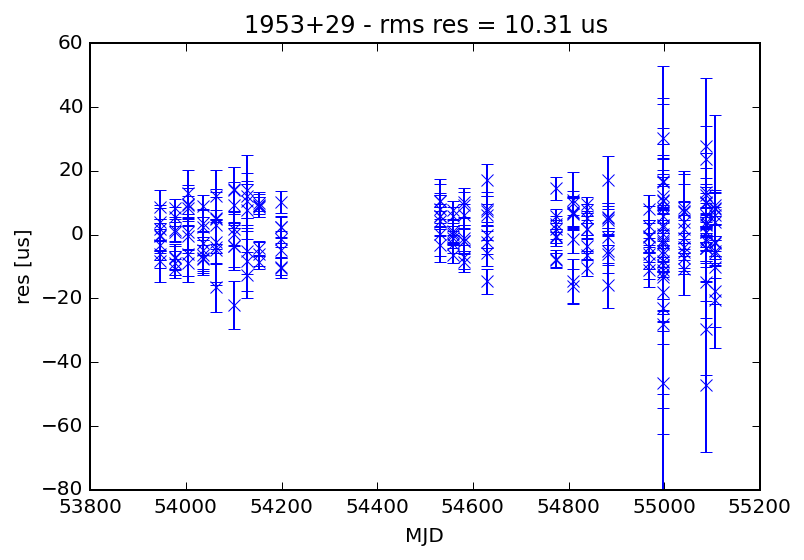

In [6]:
LT.add_line(psr,f=10**6.5,A=1e-5)
LT.add_efac(psr,efac=1.0,seed=1234)
LP.plotres(psr)

We could also add EQUAD quadrature noise (with `add_equad`) or its coarse-grained version (with `add_jitter`), but instead we prefer some red noise of "GW-like" amplitude $10^{-12}$ and spectral slope $\gamma = -3$.

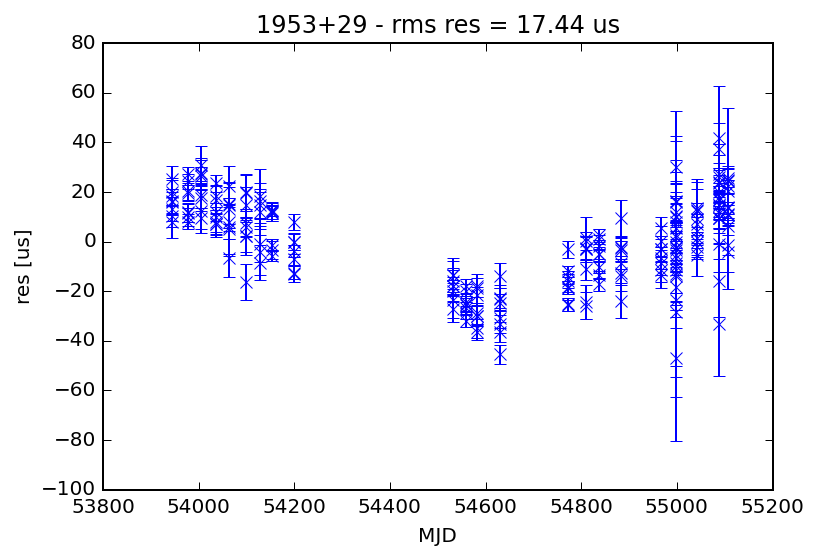

In [7]:
LT.add_rednoise(psr,1e-12,3)
LP.plotres(psr)

Or, we may add a GW background as simulated by the tempo2 GWbkgrd plugin (see the docstring below).

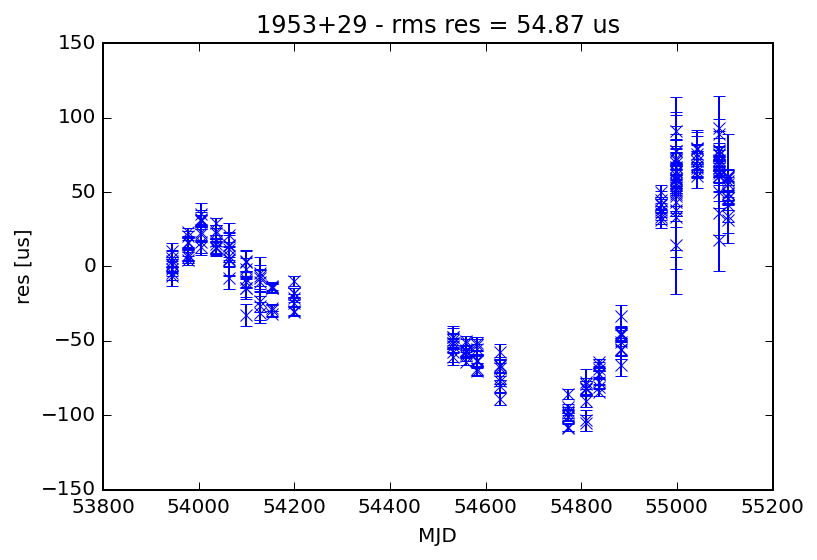

In [8]:
LT.add_gwb(psr,flow=1e-8,gwAmp=5e-12)
LP.plotres(psr)

In [9]:
help(LT.add_gwb)

Help on function add_gwb in module libstempo.toasim:

add_gwb(psr, dist=1, ngw=1000, seed=None, flow=1e-08, fhigh=1e-05, gwAmp=1e-20, alpha=-0.66, logspacing=True)
    Add a stochastic background from inspiraling binaries, using the tempo2
    code that underlies the GWbkgrd plugin.
    
    Here 'dist' is the pulsar distance [in kpc]; 'ngw' is the number of binaries,
    'seed' (a negative integer) reseeds the GWbkgrd pseudorandom-number-generator,
    'flow' and 'fhigh' [Hz] determine the background band, 'gwAmp' and 'alpha'
    determine its amplitude and exponent, and setting 'logspacing' to False
    will use linear spacing for the individual sources.
    
    It is also possible to create a background object with
    
    gwb = GWB(ngw,seed,flow,fhigh,gwAmp,alpha,logspacing)
    
    then call the method gwb.add_gwb(pulsar[i],dist) repeatedly to get a
    consistent background for multiple pulsars.
    
    Returns the GWB object



Refitting will remove some of the power.

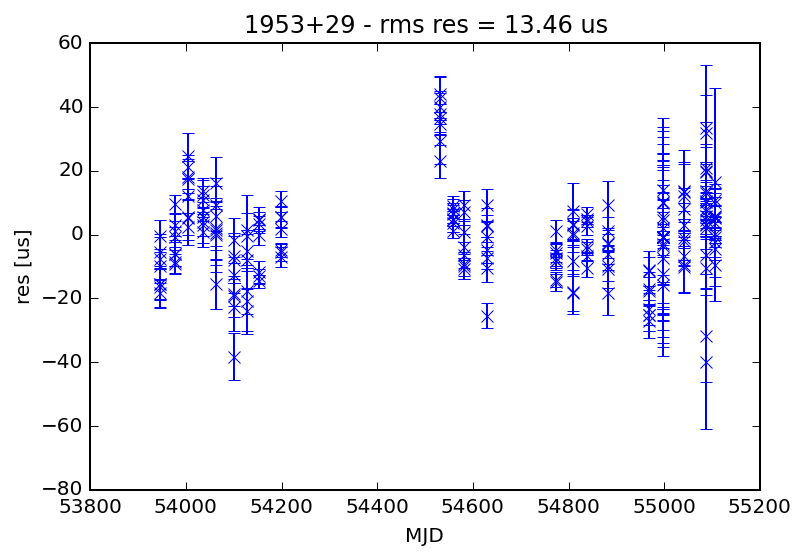

In [10]:
psr.fit()
LP.plotres(psr)

All done! We can save the resulting par and tim file, and analyze them with a favorite pipeline.

In [11]:
psr.savepar('B1953+29-simulate.par')
psr.savetim('B1953+29-simulate.tim')

Note that currently the tim file that is output by tempo2 has a spurious "`MODE 1`" line that tempo2 does not like upon reloading. To erase it, you can do

In [12]:
T.purgetim('B1953+29-simulate.tim')

And if we reload the files we get pack the same thing...

fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '903.617')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '1024.099')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '1144.581')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '1024.099')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '301.206')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' ', '602.411')
pta
(' ', 'NANOGrav')
proc
(' ', 'dfg+12')
chanid
(' ', 'asp_1386')
fe
(' ', 'L_wide')
be
(' ', 'ASP')
B
(' ', 'L')
bw
(' ', '4.0')
tobs
(' '

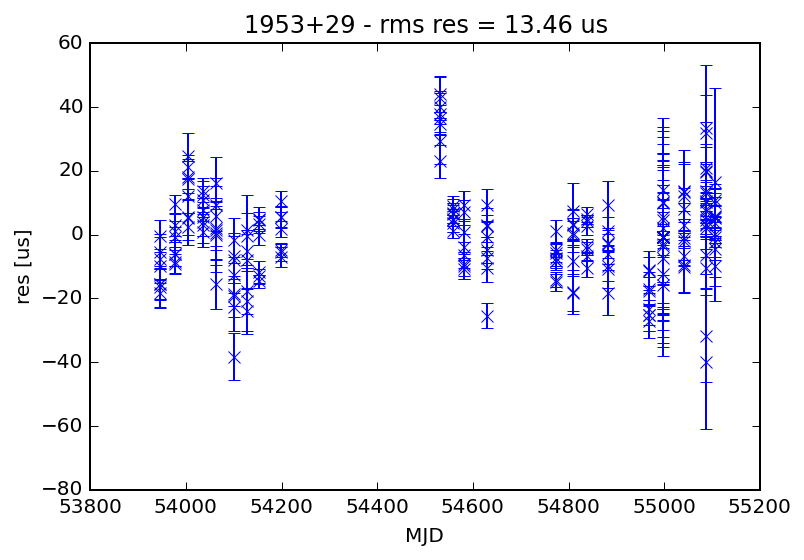

In [13]:
psr2 = T.tempopulsar(parfile = 'B1953+29-simulate.par',
                     timfile = 'B1953+29-simulate.tim')
LP.plotres(psr2)

It's also possible to obtain a perfect realization of the timing model described in a par file without a tim file, by specifying a new set of observation times (in MJD) and errors (in us). The observation frequency, observatory, and flags can also be specified (see the docstring below).

In [14]:
psr = LT.fakepulsar(parfile=T.data+'B1953+29_NANOGrav_dfg+12.par',
                    obstimes=N.arange(53000,54800,30)+N.random.randn(60),  # observe every 30+-1 days
                    toaerr=0.1)

LT.add_efac(psr,efac=1.0,seed=1234)
LP.plotres(psr)

TypeError: 'str' does not support the buffer interface

In [94]:
help(LT.fakepulsar)

Help on function fakepulsar in module libstempo.toasim:

fakepulsar(parfile, obstimes, toaerr, freq=1440.0, observatory='AXIS', flags='')
    Returns a libstempo tempopulsar object corresponding to a noiseless set
    of observations for the pulsar specified in 'parfile', with observations
    happening at times (MJD) given in the array (or list) 'obstimes', with
    measurement errors given by toaerr (us).
    
    A new timfile can then be saved with pulsar.savetim(). Re the other parameters:
    
    - 'toaerr' needs to be either a common error, or a list of errors
       of the same length of 'obstimes';
    - 'freq' can be either a common observation frequency in MHz, or a list;
       it defaults to 1440;
    - 'observatory' can be either a common observatory name, or a list;
       it defaults to the IPTA MDC 'AXIS';
    - 'flags' can be a string (such as '-sys EFF.EBPP.1360') or a list of strings;
       it defaults to an empty string.

